# Air Quality Index In India


This is the project on AQI in India of last few year(2015-2020).The dataset consists of AQIs of some of the cities. I got this dataset for this project from Kaggle[https://www.kaggle.com/rohanrao/air-quality-data-in-india] and was recommended by jovian itself in thier forum. I tried to extract a lot of information from the datset using Pandas, matplotlib, seaborn etc; about the deviation of AQI in some years,how it was deviating in various months, how it is different in various Cities, which city got the highest AQI during these years, etc

I really want to thank [Data Analysis with Python: Zero to Pandas](zerotopandas.com) which helped me in learning a lot aboout Data Analysis, I have learned various operations which can be done by importing various modules and libraries so that information can be easily extraxted out of the dataset.


## Downloading the Dataset

I have downloaded the dataset from the Kaggle(https://www.kaggle.com/rohanrao/air-quality-data-in-india) regarding the AQI index in some cities in India. It is the CSV file.

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/rohanrao/air-quality-data-in-india' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vedangisharma
Your Kaggle Key: ········


  8%|▊         | 6.00M/72.9M [00:00<00:01, 61.3MB/s]

100%|██████████| 72.9M/72.9M [00:01<00:00, 64.8MB/s]


The dataset has been downloaded and extracted.

In [5]:
data_dir = './air-quality-data-in-india'

In [6]:
import os
os.listdir(data_dir)

['city_hour.csv',
 'city_day.csv',
 'station_day.csv',
 'stations.csv',
 'station_hour.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "aqi-in-india" 

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "vedangi001/aqi-in-india" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/vedangi001/aqi-in-india


'https://jovian.ai/vedangi001/aqi-in-india'

## Data Preparation and Cleaning

the dataset consists the data of various cities in each day for past few years.Some rows have a lot of  NAN values, so we need to remove them, as we can not gather a lot of information from those rows.



In [11]:
import pandas as pd

In [12]:
dataset=pd.read_csv('air-quality-data-in-india/city_day.csv')

In [13]:
dataset

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [15]:
dataset.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [16]:
dataset.AQI[dataset.AQI==2049]

1145    2049.0
Name: AQI, dtype: float64

In [17]:
df=dataset[dataset.AQI_Bucket=='Severe']
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe
33,Ahmedabad,2015-02-03,139.70,NaN,30.61,28.40,56.73,NaN,30.61,33.79,73.60,0.17,0.03,11.87,660.0,Severe
43,Ahmedabad,2015-02-13,103.36,NaN,18.18,39.56,57.33,NaN,18.18,80.43,40.11,11.29,24.35,3.35,510.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26454,Talcher,2019-02-15,68.38,336.82,35.57,NaN,29.15,7.66,2.52,16.17,7.50,0.00,NaN,NaN,425.0,Severe
26461,Talcher,2019-02-22,116.52,768.16,27.89,NaN,24.94,7.23,4.20,16.71,3.71,0.00,NaN,NaN,437.0,Severe
26463,Talcher,2019-02-24,71.07,369.02,32.85,NaN,27.66,7.52,2.96,6.63,8.00,0.00,NaN,NaN,437.0,Severe
26719,Talcher,2019-11-07,48.32,512.41,41.82,1.21,41.62,8.49,2.11,36.43,13.67,0.00,NaN,NaN,401.0,Severe


The dataset consist of so many rows having different AQIs but this project is mainly for the cities having higher AQI or where conditions is severe. So, the other AQI rows where condition is not so Severe can be removed

In [18]:
columns=['City','Date','PM2.5','NO','NO2','NOx','CO','SO2','O3','AQI']

In [19]:
dfs=df[columns].copy()
dfs=dfs.dropna()
dfs

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI
30,Ahmedabad,2015-01-31,94.52,24.39,32.66,52.61,24.39,67.39,111.33,514.0
31,Ahmedabad,2015-02-01,135.99,43.48,42.08,84.57,43.48,75.23,102.70,782.0
32,Ahmedabad,2015-02-02,178.33,54.56,35.31,72.80,54.56,55.04,107.38,914.0
33,Ahmedabad,2015-02-03,139.70,30.61,28.40,56.73,30.61,33.79,73.60,660.0
43,Ahmedabad,2015-02-13,103.36,18.18,39.56,57.33,18.18,80.43,40.11,510.0
...,...,...,...,...,...,...,...,...,...,...
26379,Talcher,2018-12-02,100.93,25.19,0.02,23.45,1.86,18.29,8.62,434.0
26429,Talcher,2019-01-21,99.88,23.55,0.03,22.54,2.34,31.05,10.45,456.0
26445,Talcher,2019-02-06,88.48,31.82,3.79,27.05,2.81,19.88,8.99,439.0
26719,Talcher,2019-11-07,48.32,41.82,1.21,41.62,2.11,36.43,13.67,401.0


In [20]:
dfs['Date']=pd.to_datetime(dfs.Date)
dfs['year'] = pd.DatetimeIndex(dfs.Date).year
dfs['month'] = pd.DatetimeIndex(dfs.Date).month
dfs['day'] = pd.DatetimeIndex(dfs.Date).day
dfs['weekday'] = pd.DatetimeIndex(dfs.Date).weekday

In [21]:
dfs

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI,year,month,day,weekday
30,Ahmedabad,2015-01-31,94.52,24.39,32.66,52.61,24.39,67.39,111.33,514.0,2015,1,31,5
31,Ahmedabad,2015-02-01,135.99,43.48,42.08,84.57,43.48,75.23,102.70,782.0,2015,2,1,6
32,Ahmedabad,2015-02-02,178.33,54.56,35.31,72.80,54.56,55.04,107.38,914.0,2015,2,2,0
33,Ahmedabad,2015-02-03,139.70,30.61,28.40,56.73,30.61,33.79,73.60,660.0,2015,2,3,1
43,Ahmedabad,2015-02-13,103.36,18.18,39.56,57.33,18.18,80.43,40.11,510.0,2015,2,13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26379,Talcher,2018-12-02,100.93,25.19,0.02,23.45,1.86,18.29,8.62,434.0,2018,12,2,6
26429,Talcher,2019-01-21,99.88,23.55,0.03,22.54,2.34,31.05,10.45,456.0,2019,1,21,0
26445,Talcher,2019-02-06,88.48,31.82,3.79,27.05,2.81,19.88,8.99,439.0,2019,2,6,2
26719,Talcher,2019-11-07,48.32,41.82,1.21,41.62,2.11,36.43,13.67,401.0,2019,11,7,3


In [22]:
import jovian

In [23]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "vedangi001/aqi-in-india" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/vedangi001/aqi-in-india


'https://jovian.ai/vedangi001/aqi-in-india'

## Exploratory Analysis and Visualization

**TODO** In this section, I mainly tried to show the information using visual repersentations such as graphs and plots.
Which can help to know out of last few years, when thr AQI was highest, the trend during various months,etc.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [24]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (20,12)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**The following graph shows in which year the AQI was highest**

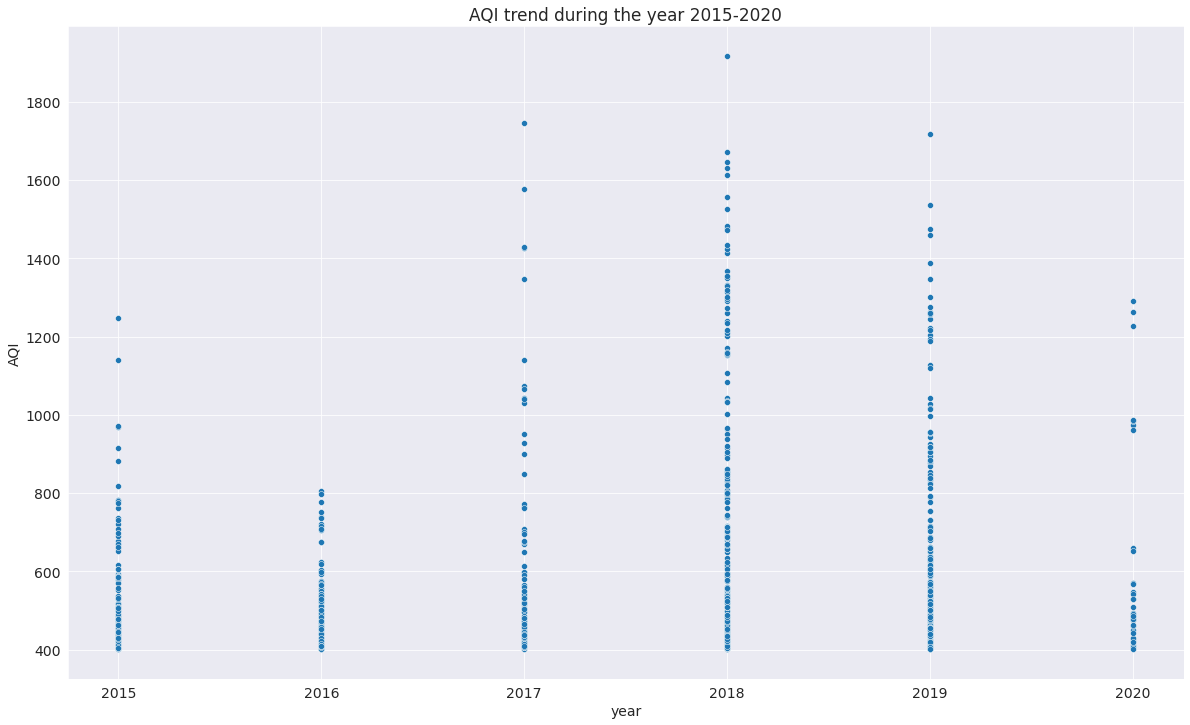

In [25]:
plt.title('AQI trend during the year 2015-2020')
sns.scatterplot(x=dfs.year, y=dfs.AQI);

The plot tells that the AQI decreases from 2015 to 2016 and then again started increasing, the AQI was highest during 2018 and its value in some cities was around 2000, we can hypothise out of this that the industrialisation, factory work maybe very high in this year, it again decreases in 2019 and even more less in 2020. The lower AQI in 2020 was because of lockdown, as factory works, industrial work, vehicles smoke emissions was very less.

**The following plot shows the trend of AQI during various months**

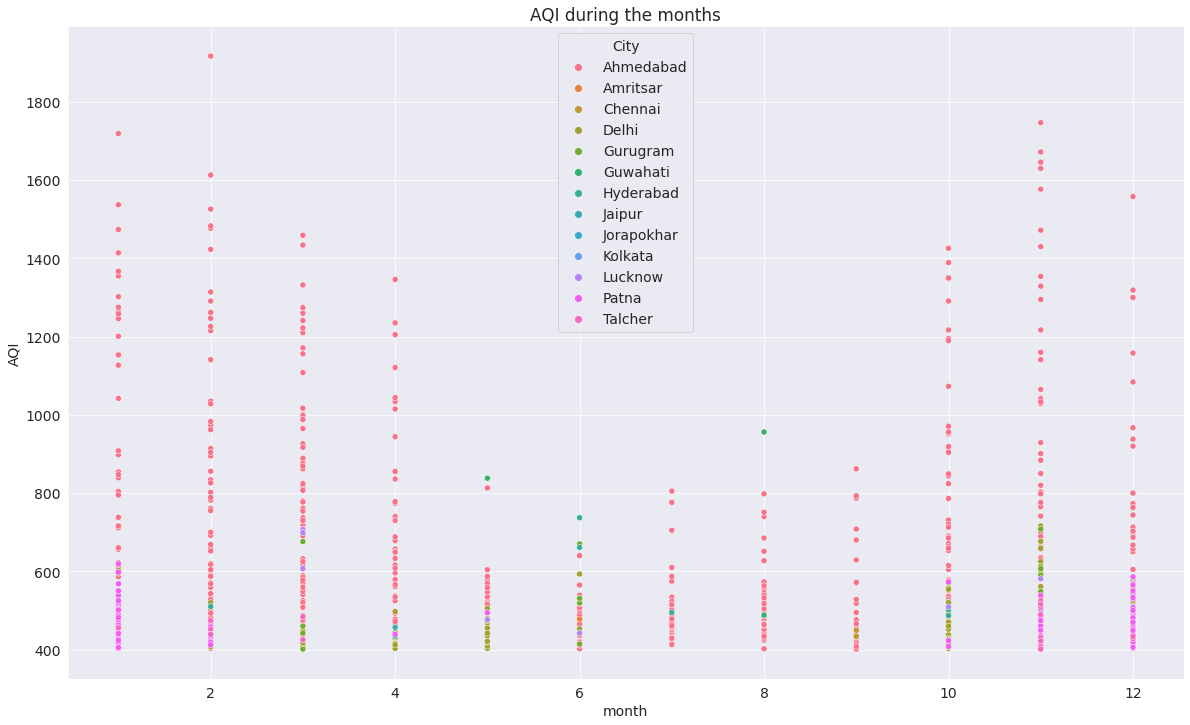

In [26]:
sns.scatterplot(x=dfs.month, y=dfs.AQI,hue=df.City);
plt.title('AQI during the months');

The above graph shows that the AQI is less during the summers and monsoon, where as the highes AQI was recorded during the winters, this maybe due to the fact that the air is more humid during the summers and monsoon and pollutants might have settled down keeping the air clear.


**The next plot shows how was the AQI variation in different cities during the year 2018** the year 2018 was selected because that is the year when the air quality was very bad 

In [27]:
year_2018=dfs[dfs.year==2018]

In [28]:
year_2018

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI,year,month,day,weekday
1099,Ahmedabad,2018-01-04,81.10,19.42,109.07,67.15,19.42,93.30,65.69,532.0,2018,1,4,3
1100,Ahmedabad,2018-01-05,73.61,25.96,173.08,103.80,25.96,93.86,36.51,534.0,2018,1,5,4
1101,Ahmedabad,2018-01-06,75.79,31.55,146.80,95.16,31.55,113.82,41.95,738.0,2018,1,6,5
1102,Ahmedabad,2018-01-07,77.87,23.19,137.62,84.44,23.19,107.58,50.46,622.0,2018,1,7,6
1103,Ahmedabad,2018-01-08,77.72,8.91,135.66,72.82,8.91,101.93,48.73,517.0,2018,1,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26374,Talcher,2018-11-27,110.22,21.49,0.32,21.42,1.92,26.37,8.15,525.0,2018,11,27,1
26375,Talcher,2018-11-28,110.75,51.52,0.25,37.78,2.96,26.82,6.40,489.0,2018,11,28,2
26377,Talcher,2018-11-30,100.66,23.27,0.10,22.40,2.08,28.86,8.24,509.0,2018,11,30,4
26378,Talcher,2018-12-01,88.36,24.03,0.09,22.83,1.84,25.13,8.19,428.0,2018,12,1,5


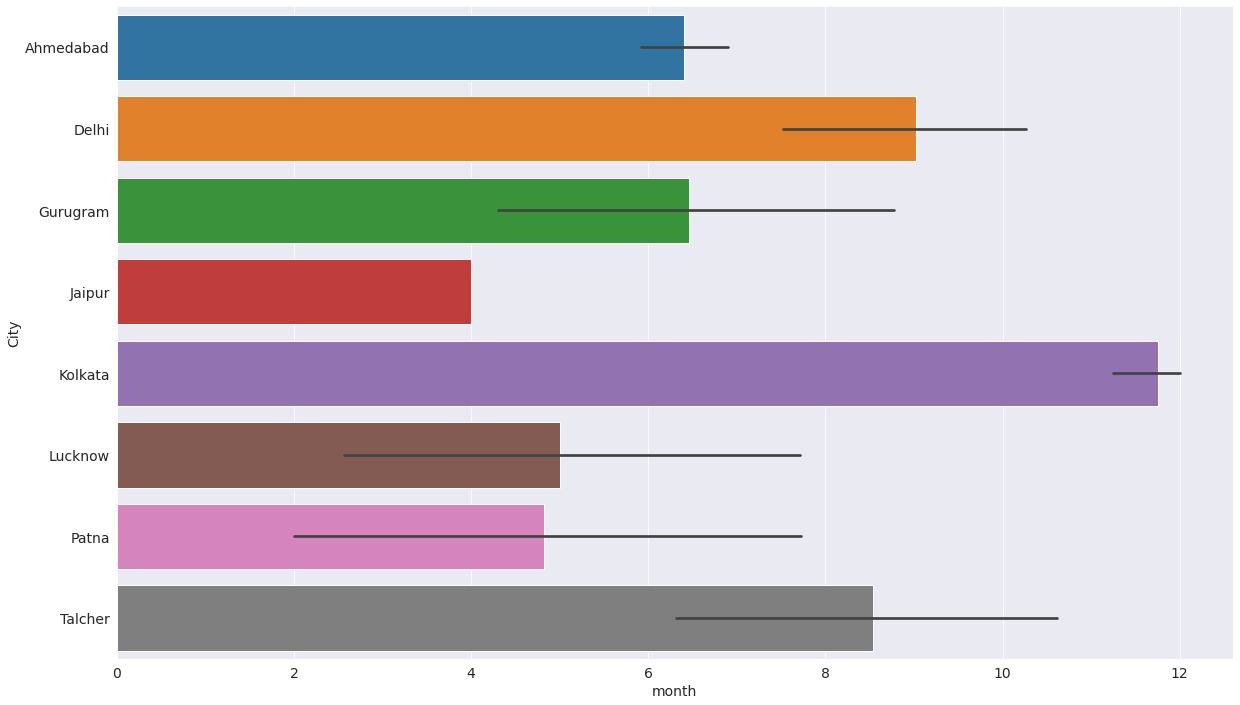

In [29]:
sns.barplot(x=year_2018.month, y=year_2018.City, data=year_2018.AQI);


The above plot shows the average was very higher in Kolkata where as the higher deviation was seen in Patna, Lucknow and Gurugram

**The following path comparably tells the AQI trend in the cities showing higher deviation**

In [30]:
pt_df=df[df.City=='Patna']
lc_df=df[df.City=='Lucknow']
gr_df=df[df.City=='Gurugram']

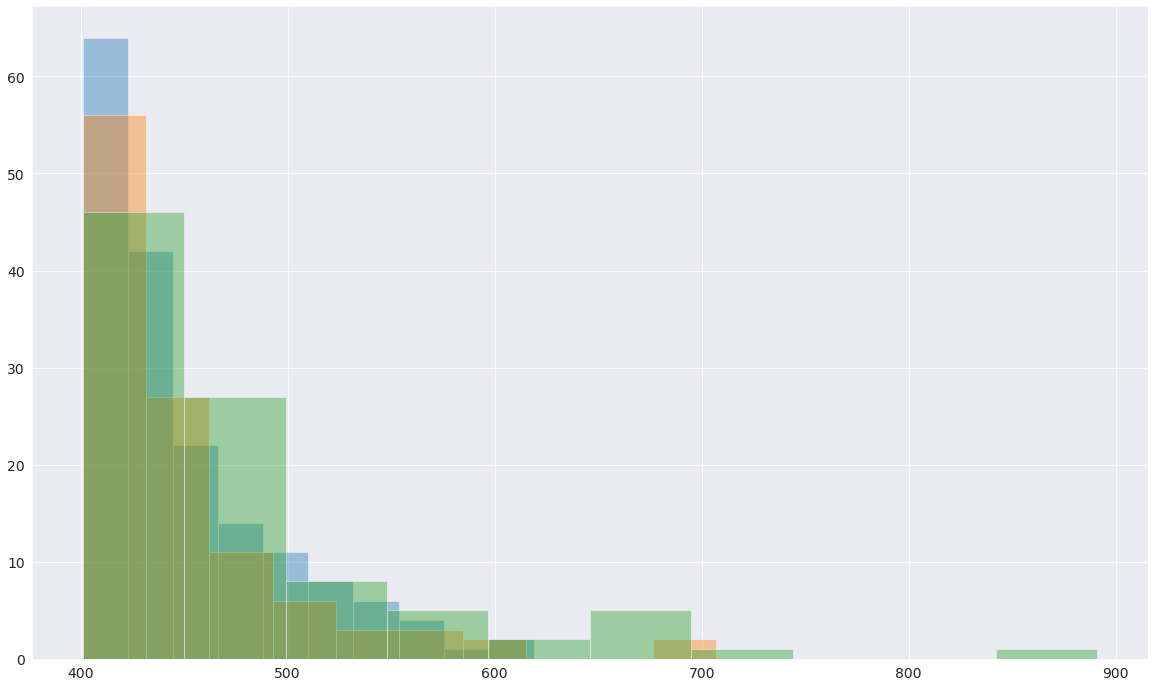

In [31]:
plt.hist(pt_df.AQI, alpha=0.4);
plt.hist(lc_df.AQI, alpha=0.4);
plt.hist(gr_df.AQI, alpha=0.4);

Let us save and upload our work to Jovian before continuing

In [32]:
import jovian

In [33]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "vedangi001/aqi-in-india" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/vedangi001/aqi-in-india


'https://jovian.ai/vedangi001/aqi-in-india'

## Asking and Answering Questions
In this section I have asked some common question which can be arise just by the looking data in its visual format till the time and tried to answer them.



#### Q1: What is the variation of AQI during the week in Delhi?

In [34]:
city=year_2018[year_2018.City=='Delhi']

In [35]:
city

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI,year,month,day,weekday
11325,Delhi,2018-01-01,303.41,62.76,63.92,11.79,1.80,18.58,68.75,462.0,2018,1,1,0
11326,Delhi,2018-01-02,277.48,31.26,53.73,4.26,1.52,12.43,68.68,439.0,2018,1,2,1
11327,Delhi,2018-01-03,217.01,37.98,52.24,2.87,1.29,10.28,54.94,405.0,2018,1,3,2
11330,Delhi,2018-01-06,252.57,65.27,59.12,8.53,1.59,18.15,39.65,403.0,2018,1,6,5
11342,Delhi,2018-01-18,276.25,48.32,55.08,85.75,2.04,21.02,72.89,411.0,2018,1,18,3
11343,Delhi,2018-01-19,253.70,41.26,49.45,81.11,1.82,22.27,73.60,451.0,2018,1,19,4
11435,Delhi,2018-04-21,119.24,9.64,30.99,35.73,0.89,12.08,61.05,444.0,2018,4,21,5
11488,Delhi,2018-06-13,261.77,11.58,25.75,30.62,0.77,6.91,27.45,453.0,2018,6,13,2
11489,Delhi,2018-06-14,225.49,11.75,25.37,29.01,0.72,7.22,43.38,522.0,2018,6,14,3
11490,Delhi,2018-06-15,153.28,12.05,24.61,29.31,0.70,7.31,40.15,593.0,2018,6,15,4


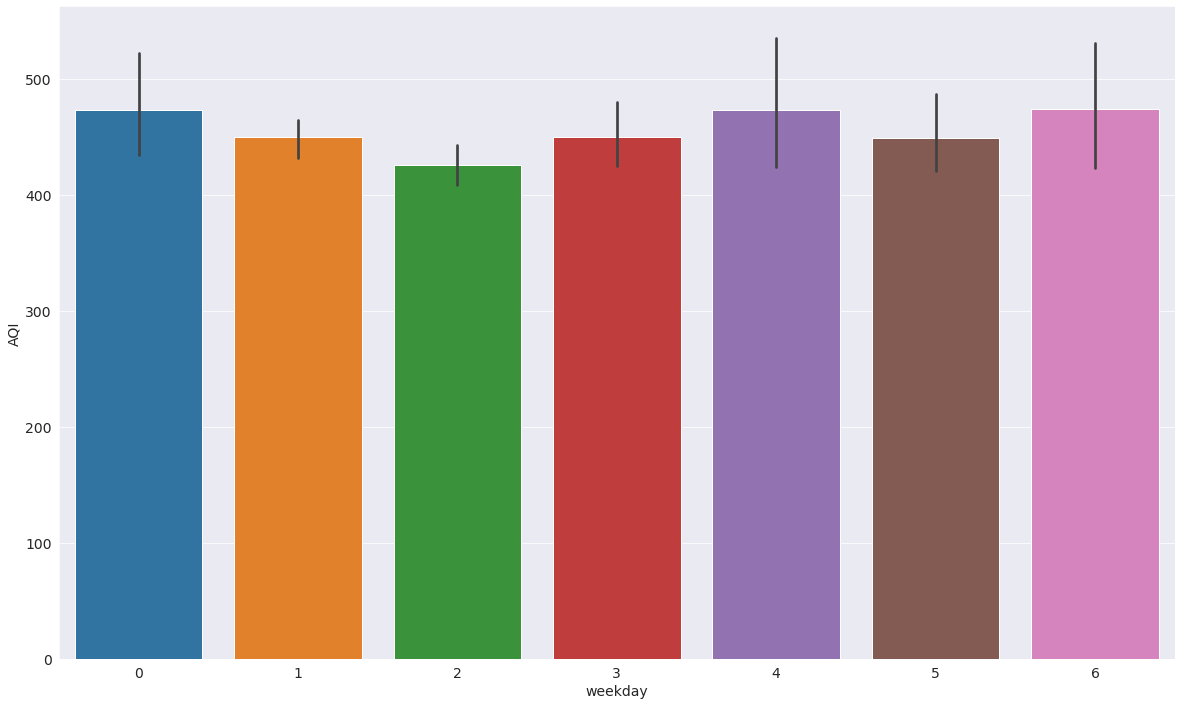

In [36]:
sns.barplot(x=city.weekday,y=city.AQI);

#### Q2: Which pollutant has significantly increase during the years in Delhi??

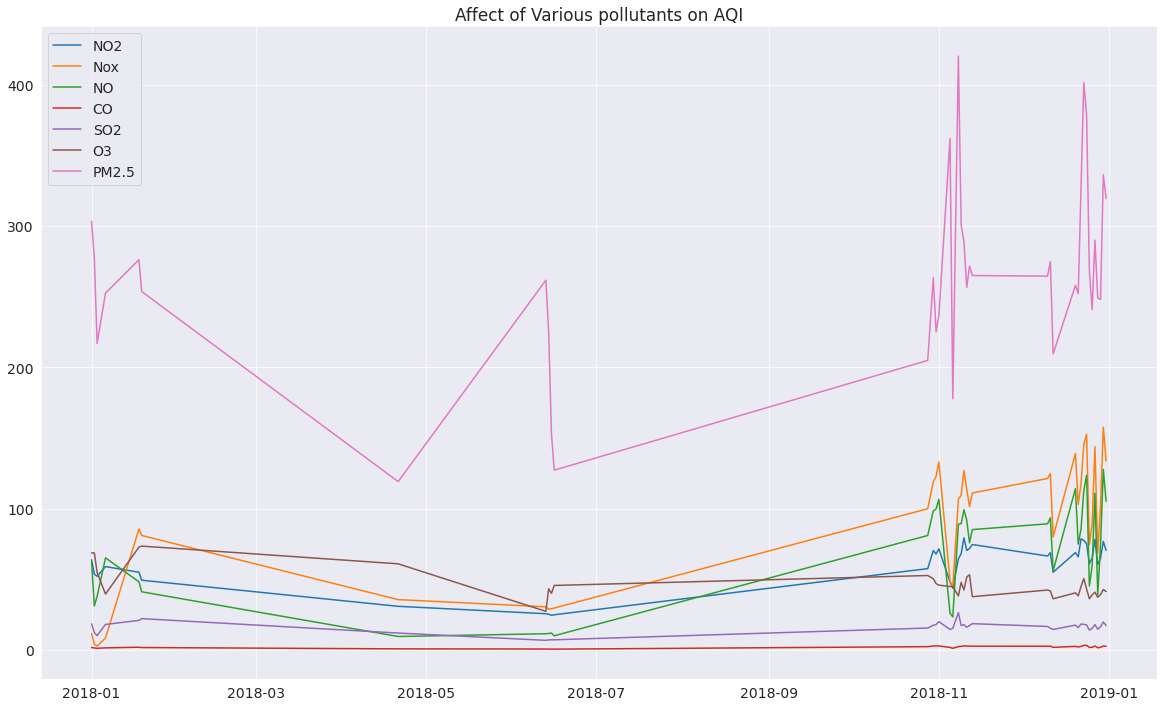

In [37]:
plt.plot(city.Date,city.NO2);
plt.plot(city.Date,city.NOx);
plt.plot(city.Date,city.NO);
plt.plot(city.Date,city.CO);
plt.plot(city.Date,city.SO2);
plt.plot(city.Date,city.O3);
pm=city['PM2.5'];
plt.plot(city.Date,pm);
plt.legend(['NO2','Nox','NO','CO','SO2','O3','PM2.5']);
plt.title('Affect of Various pollutants on AQI');

The plot tells that the PM2.5 is the pollutant which is majorly affecting the AQI, the Nox is the gas which has signnificantly increased during past years.

#### Q3: When Ahemdabad shows the maximum AQI?

In [38]:
ahm=dfs[dfs.City=='Ahmedabad']

In [39]:
ahm

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI,year,month,day,weekday
30,Ahmedabad,2015-01-31,94.52,24.39,32.66,52.61,24.39,67.39,111.33,514.0,2015,1,31,5
31,Ahmedabad,2015-02-01,135.99,43.48,42.08,84.57,43.48,75.23,102.70,782.0,2015,2,1,6
32,Ahmedabad,2015-02-02,178.33,54.56,35.31,72.80,54.56,55.04,107.38,914.0,2015,2,2,0
33,Ahmedabad,2015-02-03,139.70,30.61,28.40,56.73,30.61,33.79,73.60,660.0,2015,2,3,1
43,Ahmedabad,2015-02-13,103.36,18.18,39.56,57.33,18.18,80.43,40.11,510.0,2015,2,13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1886,Ahmedabad,2020-03-01,53.06,22.34,59.64,45.76,22.34,70.80,41.70,475.0,2020,3,1,6
1887,Ahmedabad,2020-03-02,56.20,23.13,62.85,47.92,23.13,81.42,34.18,508.0,2020,3,2,0
1888,Ahmedabad,2020-03-03,77.58,21.26,60.32,45.29,21.26,119.95,39.83,460.0,2020,3,3,1
1903,Ahmedabad,2020-03-18,58.54,15.45,44.39,33.18,15.45,42.86,81.35,487.0,2020,3,18,2


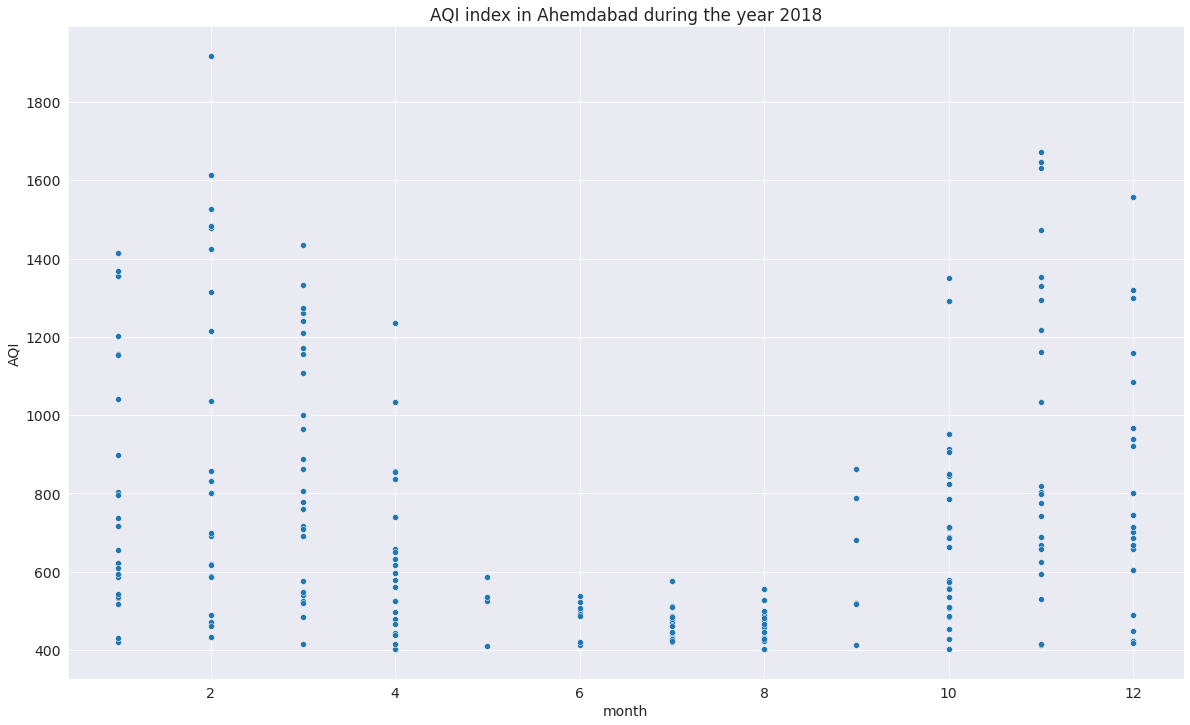

In [40]:
sns.scatterplot(x=ahm.month[ahm.year==2018],y=ahm.AQI);
plt.title('AQI index in Ahemdabad during the year 2018');

The Ahemedabad shows the highest AQI during the feb month of the year 2018

#### Q4: How was the variation of different pollutants during the various year in Kolkata?

In [41]:
klk=dfs[dfs.City=='Kolkata']
klk

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,AQI,year,month,day,weekday
19244,Kolkata,2018-11-08,276.33,24.08,65.65,89.73,1.48,17.82,46.50,431.0,2018,11,8,3
19273,Kolkata,2018-12-07,267.93,135.62,104.89,231.23,1.74,24.28,31.93,425.0,2018,12,7,4
19275,Kolkata,2018-12-09,227.13,134.63,107.29,214.57,1.11,12.85,26.85,418.0,2018,12,9,6
19276,Kolkata,2018-12-10,199.91,134.22,84.86,204.40,1.24,9.08,34.42,407.0,2018,12,10,0
19301,Kolkata,2019-01-04,264.84,88.23,124.79,155.73,1.13,17.16,38.73,431.0,2019,1,4,4
19309,Kolkata,2019-01-12,264.75,152.42,94.91,244.34,1.42,18.51,29.41,405.0,2019,1,12,5
19311,Kolkata,2019-01-14,282.90,155.42,124.83,252.14,1.67,26.99,28.09,408.0,2019,1,14,0
19312,Kolkata,2019-01-15,217.59,76.15,107.24,151.68,1.10,17.35,32.47,406.0,2019,1,15,1
19316,Kolkata,2019-01-19,269.06,95.75,111.71,210.46,1.99,19.80,28.38,421.0,2019,1,19,5
19317,Kolkata,2019-01-20,252.42,161.72,95.09,207.49,1.64,19.09,27.88,407.0,2019,1,20,6


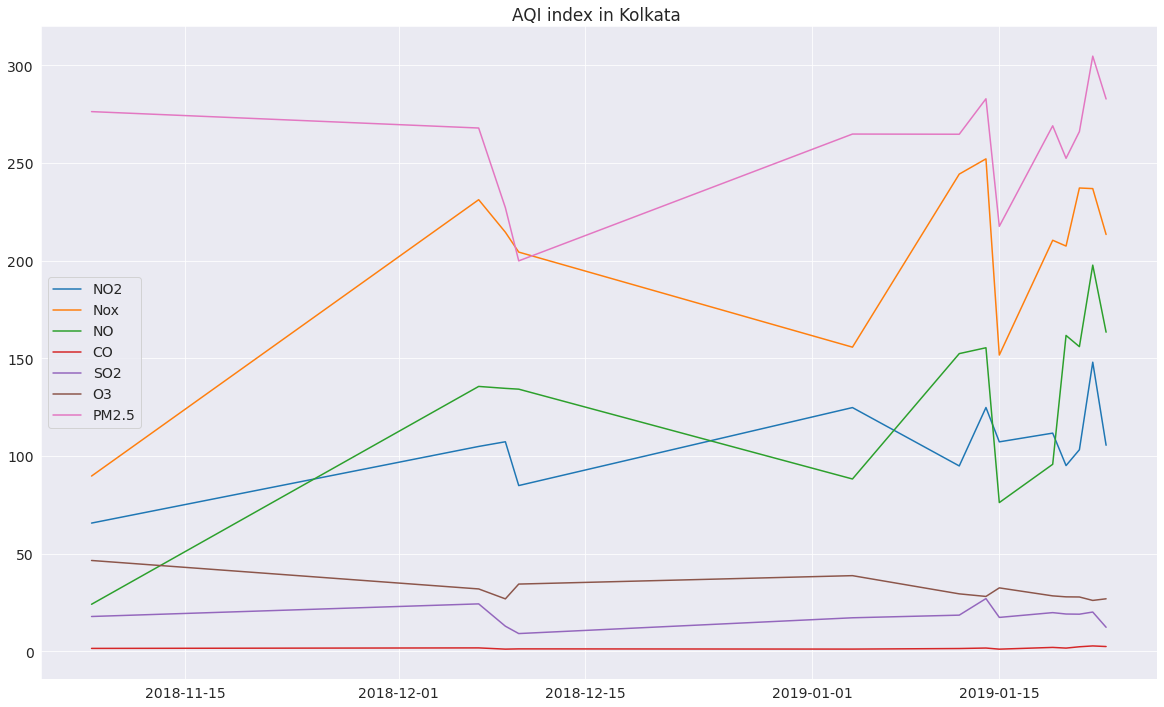

In [42]:
plt.plot(klk.Date,klk.NO2);
plt.plot(klk.Date,klk.NOx);
plt.plot(klk.Date,klk.NO);
plt.plot(klk.Date,klk.CO);
plt.plot(klk.Date,klk.SO2);
plt.plot(klk.Date,klk.O3);
pm=klk['PM2.5'];
plt.plot(klk.Date,pm);
plt.legend(['NO2','Nox','NO','CO','SO2','O3','PM2.5']);
plt.title('AQI index in Kolkata ');

As in Delhi, the NOx and the PM2.5 are the majorly affecting the AQI

Let us save and upload our work to Jovian before continuing.

In [43]:
import jovian

In [44]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "vedangi001/aqi-in-india" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/vedangi001/aqi-in-india


'https://jovian.ai/vedangi001/aqi-in-india'

## Inferences and Conclusion

The inference I have taken out of this project is that the AQI of Ahemedabad was worst during past years, the highest Average was shown in Kolkata, also The PM2.5 and NOx was the major pollutant affecting the AQI.

In [45]:
import jovian

In [46]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "vedangi001/aqi-in-india" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Committed successfully! https://jovian.ai/vedangi001/aqi-in-india


'https://jovian.ai/vedangi001/aqi-in-india'

In [47]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
